In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exec_time_list = np.zeros((4, 9, 10), dtype=np.float64)

In [3]:
for sched_idx, scheduling_type in enumerate(range(1,5)):
    for thread_idx, num_of_thread in enumerate([1,2,4,6,8,10,12,14,16]):
        print(scheduling_type, num_of_thread)
        for repeat in range(10):
            output = ! ./a.out {scheduling_type} {num_of_thread}
            exec_time_list[sched_idx, thread_idx, repeat] = float(output[0].split(':')[1].split('ms')[0].strip())

1 1
1 2
1 4
1 6
1 8
1 10
1 12
1 14
1 16
2 1
2 2
2 4
2 6
2 8
2 10
2 12
2 14
2 16
3 1
3 2
3 4
3 6
3 8
3 10
3 12
3 14
3 16
4 1
4 2
4 4
4 6
4 8
4 10
4 12
4 14
4 16


In [6]:
exec_time_list

array([[[2041.835, 2022.433, 2017.934, 2021.83 , 2018.914, 2019.399,
         2022.11 , 2017.956, 2020.629, 2018.102],
        [1499.433, 1508.817, 1492.564, 1495.928, 1494.545, 1495.118,
         1495.368, 1492.505, 1497.056, 1495.743],
        [ 882.588,  883.904,  888.777,  884.966,  883.53 ,  882.909,
          882.085,  883.116,  892.42 ,  883.227],
        [ 660.457,  657.845,  654.171,  654.558,  664.123,  670.305,
          654.541,  661.206,  659.1  ,  661.77 ],
        [ 553.304,  557.787,  556.413,  554.899,  543.655,  549.716,
          553.397,  565.63 ,  552.809,  551.31 ],
        [ 522.185,  476.76 ,  524.515,  499.47 ,  490.048,  504.454,
          493.759,  484.026,  512.797,  541.12 ],
        [ 475.722,  462.026,  488.124,  454.767,  465.591,  473.681,
          473.871,  456.651,  455.453,  460.978],
        [ 442.552,  428.857,  461.824,  481.937,  426.992,  441.311,
          442.458,  442.987,  417.67 ,  448.575],
        [ 439.088,  427.211,  426.844,  435.118,

In [5]:
exec_time_list = exec_time_list * 1000.

In [7]:
exec_time_mean = np.mean(exec_time_list, axis=2)
exec_time_std = np.std(exec_time_list, axis=2)
exec_time_mean.shape, exec_time_std.shape

((4, 9), (4, 9))

Text(0.5, 1.0, 'Execution Time')

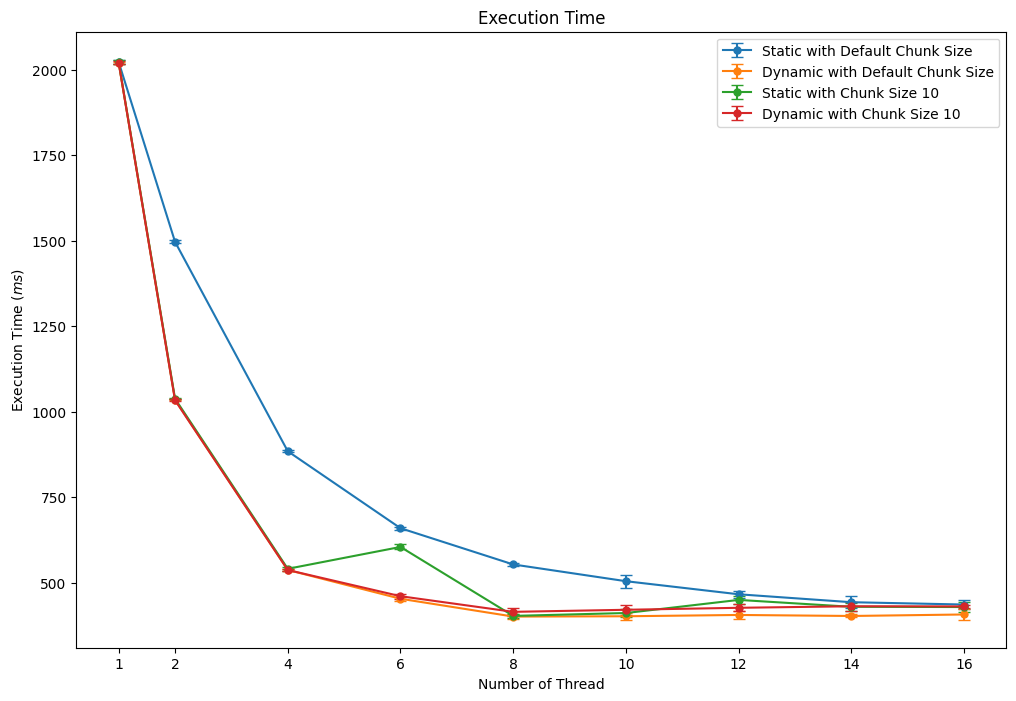

In [8]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static with Default Chunk Size', 
    'Dynamic with Default Chunk Size', 
    'Static with Chunk Size 10', 
    'Dynamic with Chunk Size 10'
]
plt.figure(figsize=(12,8))
for sched_idx, scheduling_type in enumerate(range(1,5)):
    plt.errorbar(
        x=thread_list, 
        y=exec_time_mean[sched_idx, :], 
        yerr=exec_time_std[sched_idx, :], 
        fmt='o-',
        capsize=4,
        markersize=5,
        label=label_list[sched_idx]
    )
plt.legend()
plt.xticks(thread_list)
plt.xlabel('Number of Thread')
plt.ylabel('Execution Time $(ms)$')
plt.title('Execution Time')

In [9]:
perf_time_list = 1. / exec_time_list
perf_time_list.shape

(4, 9, 10)

In [10]:
perf_time_mean = np.mean(perf_time_list, axis=2)
perf_time_std = np.std(perf_time_list, axis=2)
perf_time_mean.shape, perf_time_std.shape

((4, 9), (4, 9))

Text(0.5, 1.0, 'Performance')

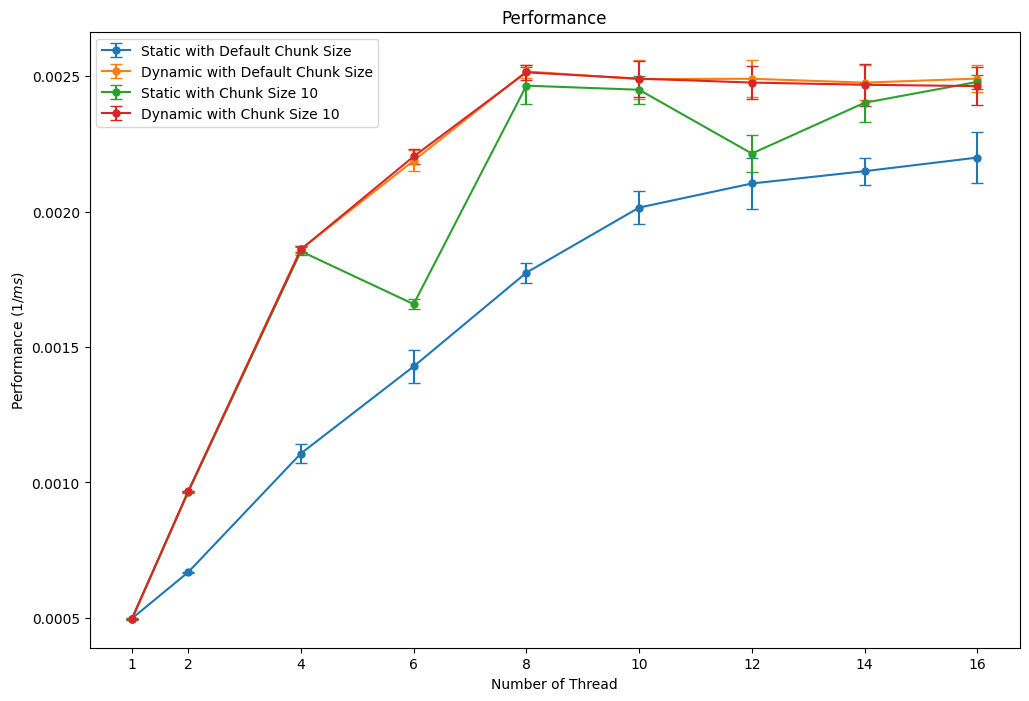

In [11]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static with Default Chunk Size', 
    'Dynamic with Default Chunk Size', 
    'Static with Chunk Size 10', 
    'Dynamic with Chunk Size 10'
]
plt.figure(figsize=(12,8))
for sched_idx, scheduling_type in enumerate(range(1,5)):
    plt.errorbar(
        x=thread_list, 
        y=perf_time_mean[sched_idx, :], 
        yerr=perf_time_std[sched_idx, :], 
        fmt='o-',
        capsize=4,
        markersize=5,
        label=label_list[sched_idx]
    )
plt.legend()
plt.xticks(thread_list)
plt.xlabel('Number of Thread')
plt.ylabel('Performance $(1/ms)$')
plt.title('Performance')

In [12]:
exec_time_mean

array([[2011.7094, 1496.3412,  904.5695,  701.5809,  563.8496,  496.8343,
         476.3297,  465.5904,  455.5516],
       [2022.071 , 1034.897 ,  537.4024,  457.2254,  397.2966,  402.1532,
         401.8764,  404.1693,  401.6351],
       [2019.947 , 1037.3558,  539.5997,  603.1095,  406.058 ,  408.4012,
         452.0869,  416.8006,  403.4918],
       [2019.021 , 1034.2861,  537.5799,  453.9514,  397.8365,  401.8036,
         404.1013,  405.6102,  406.3496]])

In [13]:
perf_time_mean

array([[0.00049712, 0.0006683 , 0.00110668, 0.00142806, 0.00177428,
        0.00201463, 0.0021036 , 0.00214895, 0.00219924],
       [0.00049455, 0.00096628, 0.00186089, 0.00218778, 0.00251725,
        0.00248883, 0.00249028, 0.00247599, 0.00249092],
       [0.00049506, 0.00096399, 0.00185335, 0.00165828, 0.00246474,
        0.00244972, 0.00221418, 0.00240152, 0.00247866],
       [0.00049529, 0.00096685, 0.00186026, 0.00220325, 0.0025139 ,
        0.0024907 , 0.0024762 , 0.00246809, 0.00246314]])